In [1]:
import pandas as pd

In [2]:
df_target =  pd.read_csv("data/other/power_consumption_g3.csv")

In [3]:
df_target["Date"] = pd.to_datetime(df_target["Date"])# Колоната "Date" се претвора во тип datetime
df_target.set_index(keys=["Date"], inplace=True) #👉 Колоната "Date" се поставува како индекс на DataFrame-от.
df_target.sort_index(inplace=True)

df_target.head()

#seto e voa od av9 istoto

,SolarPower
Date,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620


In [4]:
df_features =  pd.read_csv("data/other/power_consumption_g3_feat.csv")

In [5]:
df_features["Date"] = pd.to_datetime(df_features["Date"])
df_features.set_index(keys=["Date"], inplace=True)
df_features.sort_index(inplace=True)

df_features.head()


#istoto kako gore,go ima 

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085


In [6]:
df = pd.merge(left=df_features, right=df_target, left_index=True, right_index=True)
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620


In [7]:
df.isnull().sum()  #isto go ima 

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [8]:
features = ["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]
target = "SolarPower"

In [9]:
for feature in features:
    df[feature] = df[feature].interpolate(method="time") #voa e malku izmeneto

In [10]:
df.isnull().sum() #isyo

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [11]:
df = df.groupby(pd.Grouper(freq="2h")).mean() #go nema ama dadeno e 2h
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872


In [12]:
lags = range(4,0,-1) #4, 3, 2, 1  ; moze i range(1, 5) slicno
list(lags) #slicno mn 

for lag in lags:      #go nema
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)

df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,NaN,NaN,NaN,NaN,...,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,NaN,NaN,NaN,NaN,...,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,5.866833,76.3,0.081917,0.060167,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545


In [13]:
df.dropna(axis=0, inplace=True) # #Ги брише сите редови во df што содржат NaN (missing) вредности
#istot

In [14]:
df.drop(columns=features, inplace=True) #go nema

In [15]:
X, y = df.drop(columns=["SolarPower"]), df["SolarPower"].values  #values e dodadeno dr e isto i targetot e

In [16]:
from sklearn.model_selection import train_test_split
#istoto
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=False)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)     #isyo

In [18]:
lag= 4 #go nema ama „Колку чекори однапред предвидувам“ namerno e staveno i treba toa e kolku se vraka

train_X = train_X.reshape(train_X.shape[0], lag, (train_X.shape[1] // lag))
val_X = val_X.reshape(val_X.shape[0], lag, (val_X.shape[1] // lag))
test_X = test_X.reshape(test_X.shape[0], lag, (test_X.shape[1] // lag)) 
#isto

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)


In [20]:
train_X = torch.tensor(train_X, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
#isto
val_X = torch.tensor(val_X, dtype=torch.float32)
val_y = torch.tensor(val_y, dtype=torch.float32)

test_X = torch.tensor(test_X, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

In [21]:
train_dataset = TensorDataset(train_X, train_y)   #isto
val_dataset = TensorDataset(val_X, val_y)
test_dataset = TensorDataset(test_X, test_y)


"""
Овие линии ги спојуваат влезовите и таргетите во PyTorch Dataset објекти:

train_dataset → (train_X, train_y)

val_dataset → (val_X, val_y)

test_dataset → (test_X, test_y)

➡️ TensorDataset овозможува секој примерок да се земе како пар (X, y), што е неопходно за користење со DataLoader при тренирање, валидација и тестирање на моделот.
"""

In [22]:
#isto
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


"""
Овој код креира DataLoader-и за тренинг, валидација и тест:

batch_size=32 → податоците се земаат во мини-батчеви од 32 примероци

shuffle=False → не се меша редоследот (многу важно кај time series)

➡️ DataLoader овозможува ефикасно итерирање низ податоците при тренирање и евалуација на моделот.

Испитна реченица:

DataLoader ги дели податоците на батчеви и го зачувува временскиот редослед, што е клучно за временски серии.
"""

In [23]:
class CNNRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(6, 64, kernel_size=2), #mn malko e izmeneto dr e isto
            nn.ReLU(),
            nn.Conv1d(64, 128, kernel_size=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),  #voa go nema 👉 Ова е 1D адаптивен просечен pooling слој во PyTorch.
            nn.Flatten(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)  #isto
        return self.net(x)


In [24]:
model = CNNRegressor() #samo nema todevice

In [25]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3) 
#isto

In [26]:
def train(model, dataloader, loss_fn, optimizer):
    model.train()

    total_loss = 0
    for features, targets in dataloader:
        features, targets = features, targets #samo nema to device

        optimizer.zero_grad()

        outputs = model(features).squeeze(-1)  
        loss = loss_fn(outputs, targets)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    return total_loss

    #istoto

In [27]:
def evaluate(model, dataloader, loss_fn):
    model.eval()                                   #isto samo device nema

    total_loss, predictions = 0, []
    with torch.no_grad():
        for features, targets in dataloader:
            features, targets = features, targets

            outputs = model(features).squeeze(-1)
            loss = loss_fn(outputs, targets)

            predictions.extend(outputs.tolist())
            
            total_loss += loss.item()

    return total_loss, predictions

In [28]:
num_epochs = 350

In [29]:
def train_and_evaluate(model, train_loader, val_loader, loss_fn, optimizer, num_epochs):
    train_losses, val_losses = [], []
    for epoch in range(1, num_epochs + 1):
        train_loss = train(model, train_loader, loss_fn, optimizer)
        train_losses.append(train_loss)
        val_loss, pred_y = evaluate(model, val_loader, loss_fn)
        val_losses.append(val_loss)

        mape = mean_absolute_percentage_error(val_y.tolist(), pred_y)

        if epoch % 50 == 0:
            print(f"Epoch {epoch:3d}/{num_epochs} | train_loss={train_loss:.4f} val_loss={val_loss:.4f} mape={mape:.4f}")
    
    return train_losses, val_losses

    #isto

In [30]:
train_losses, val_losses = train_and_evaluate(model, train_loader, val_loader, loss_fn, optimizer, num_epochs)

Epoch  50/350 | train_loss=1140639982.0000 val_loss=339602972.0000 mape=0.0885
Epoch 100/350 | train_loss=883908105.0000 val_loss=276771511.5000 mape=0.0754
Epoch 150/350 | train_loss=792916445.0000 val_loss=248222741.5000 mape=0.0692
Epoch 200/350 | train_loss=706663931.2500 val_loss=223699347.7500 mape=0.0653
Epoch 250/350 | train_loss=600543670.5000 val_loss=197780022.7500 mape=0.0629
Epoch 300/350 | train_loss=487903904.5000 val_loss=168618556.5000 mape=0.0616
Epoch 350/350 | train_loss=402748493.3750 val_loss=137848426.5000 mape=0.0580


In [31]:
import seaborn as sns

<Axes: >

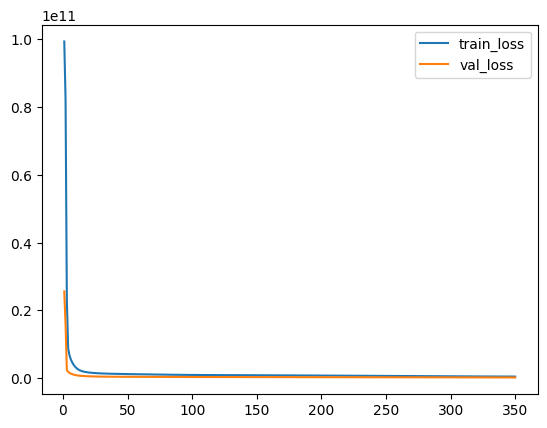

In [32]:
sns.lineplot(x=range(1, num_epochs + 1), y=train_losses, label="train_loss")
sns.lineplot(x=range(1, num_epochs + 1), y=val_losses, label="val_loss")

#isto

In [33]:
test_loss, pred_y = evaluate(model, test_loader, loss_fn)

In [34]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")     #se  e isto do sega osven so voa e 2to

MAE: 1742.43017578125
MAPE: 0.06063110753893852
MSE: 5277092.5
RMSE: 2297.1923828125
R2 Score: 0.8524512648582458
